## Problema e Coleta de Dados (Iris)

In [ ]:
# prompt: importe a base iris do sklearn e me mostre as 5 primeiras linhas com pandas

import pandas as pd
from sklearn.datasets import load_iris

# Carrega o dataset Iris
iris = load_iris()

# Cria um DataFrame do pandas com os dados e nomes das colunas
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Mostra as 5 primeiras linhas do DataFrame
print(df_iris.head())


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["target_name"] = df["target"].apply(lambda x: iris.target_names[x])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Pré-processamento - Limpeza, integração, transformação e redução

In [ ]:
print(df.isnull().sum())       # Verifica nulos
print(df.duplicated().sum())   # Verifica duplicados

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64
1


In [ ]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
142,5.8,2.7,5.1,1.9,2,virginica


In [ ]:
df.drop_duplicates(inplace=True)

## Análise Exploratória
Gráficos e estatística


*   Como as espécies se distribuem?
*   Quais atributos mais diferenciam as espécies?
*   Qual a variação (dispersão) dos atributos dentro de cada espécie?





In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


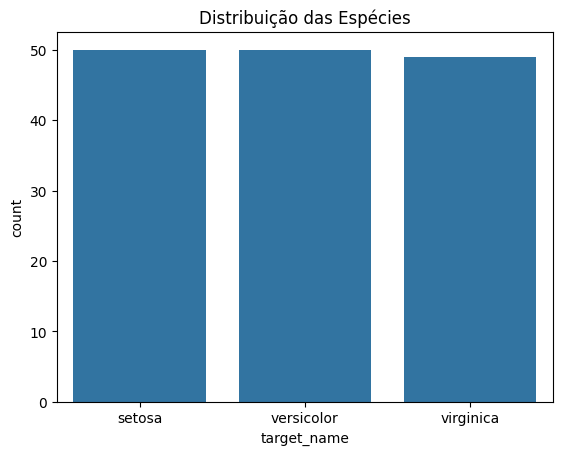

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pergunta 1: Como as espécies se distribuem?
sns.countplot(x="target_name", data=df)
plt.title("Distribuição das Espécies")
plt.show()


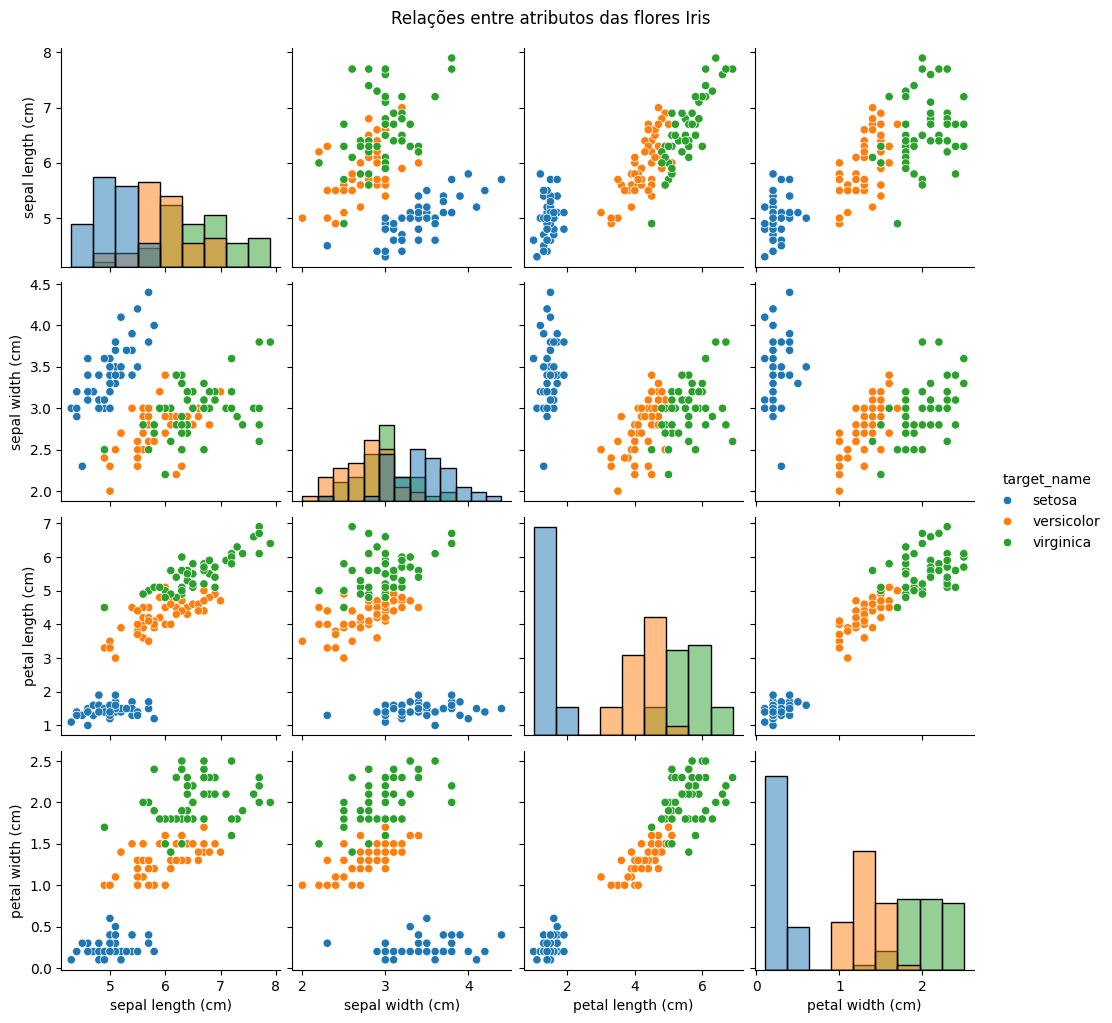

In [ ]:

# Pergunta 2: Quais atributos mais diferenciam as espécies?
sns.pairplot(df, vars=iris.feature_names, hue="target_name", diag_kind="hist")
plt.suptitle("Relações entre atributos das flores Iris", y=1.02)
plt.show()

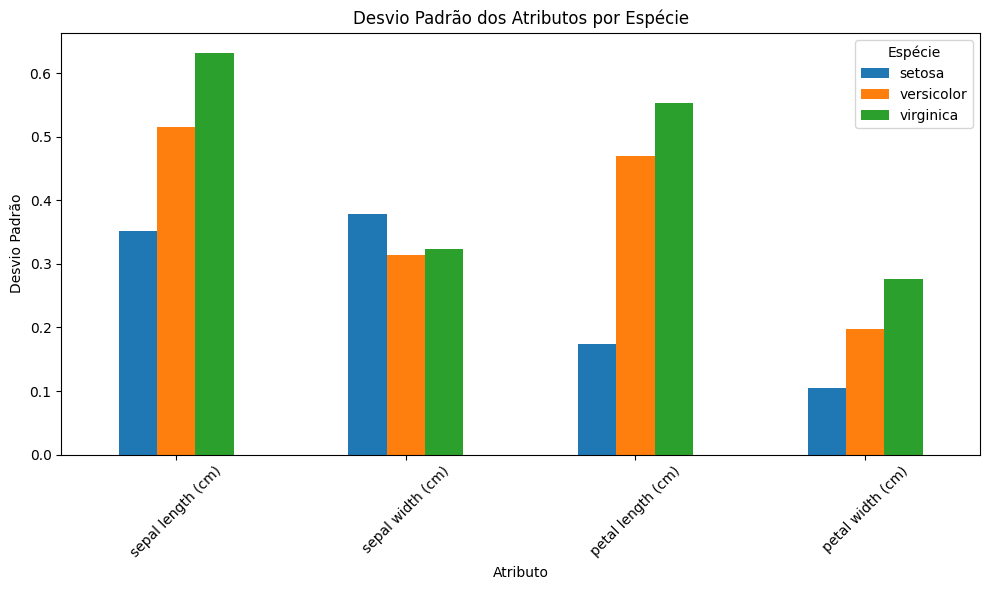

In [ ]:
# Qual a variação (dispersão) dos atributos dentro de cada espécie?
grouped_std = df.groupby("target_name")[iris.feature_names].std().T

grouped_std.plot(kind="bar", figsize=(10, 6))
plt.title("Desvio Padrão dos Atributos por Espécie")
plt.ylabel("Desvio Padrão")
plt.xlabel("Atributo")
plt.xticks(rotation=45)
plt.legend(title="Espécie")
plt.tight_layout()
plt.show()


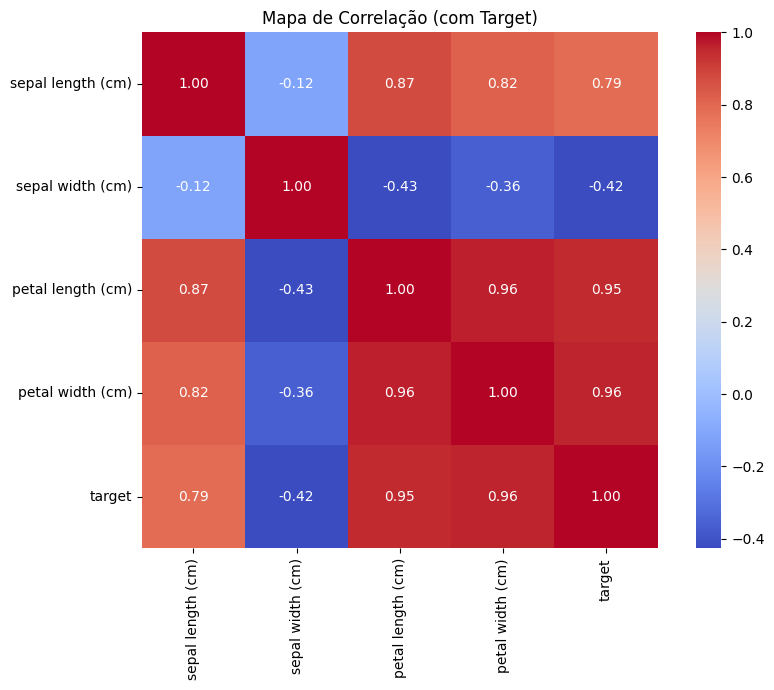

In [ ]:
# Análise de correlação
corr_with_target = df[iris.feature_names + ["target"]].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_with_target, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Mapa de Correlação (com Target)")
plt.tight_layout()
plt.show()

##  Pré-processamento 2: Separação e Normalização

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[iris.feature_names]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando os modelos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

## Treinamento dos modelos

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

## Avaliação

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Modelos clássicos
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}:\n", classification_report(y_test, y_pred))



KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


DecisionTree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


RandomForest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00   

## Interpretação

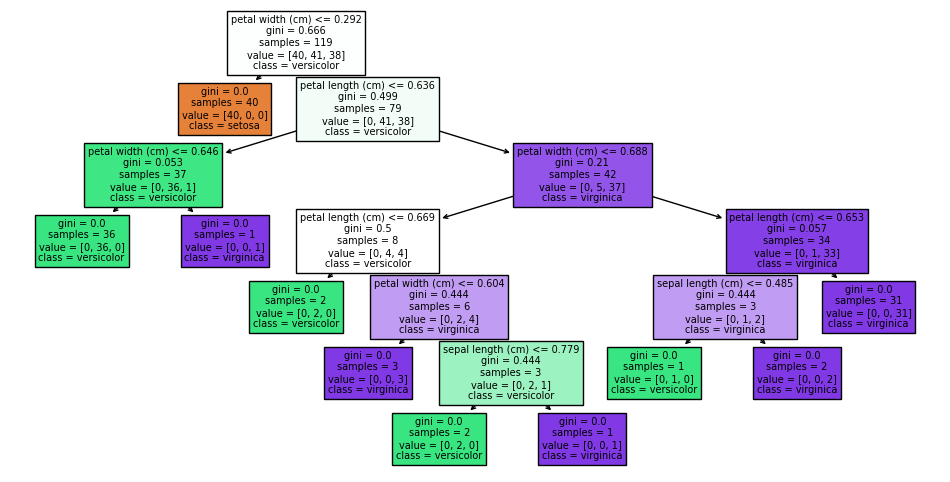

In [ ]:
# Plot da árvore
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(models["DecisionTree"], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


  0%|          | 0/30 [00:00<?, ?it/s]

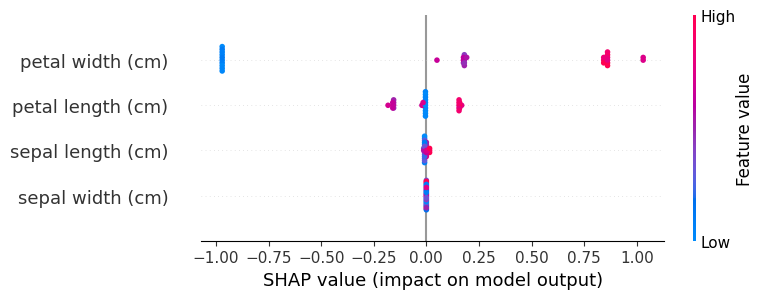

In [ ]:
import shap
explainer = shap.KernelExplainer(models["DecisionTree"].predict, pd.DataFrame(X_train_scaled, columns=iris.feature_names))

shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled)

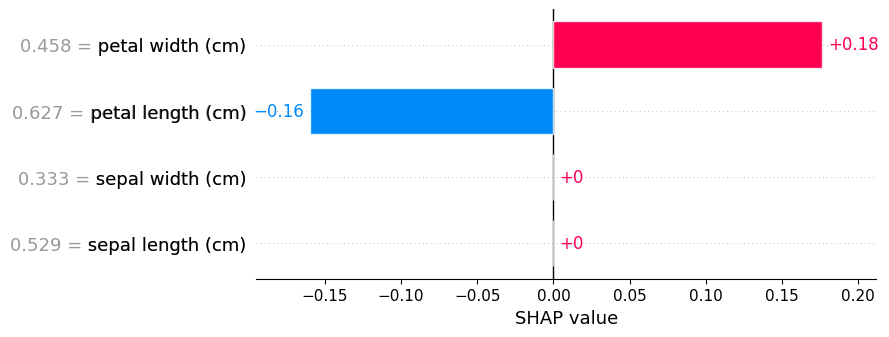

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
shap_values

.values =
array([[ 0.        ,  0.        , -0.15966387,  0.17647059],
       [-0.00840336,  0.        , -0.00420168, -0.97058824],
       [ 0.01540616,  0.        ,  0.15826331,  0.84313725],
       [ 0.        ,  0.        , -0.15966387,  0.17647059],
       [ 0.0070028 ,  0.        , -0.18207283,  0.19187675],
       [-0.00840336,  0.        , -0.00420168, -0.97058824],
       [-0.00840336,  0.        , -0.15546218,  0.18067227],
       [ 0.        ,  0.        ,  0.15546218,  0.86134454],
       [ 0.        ,  0.        , -0.15966387,  0.17647059],
       [-0.00840336,  0.        , -0.15546218,  0.18067227],
       [ 0.01540616,  0.        ,  0.15826331,  0.84313725],
       [-0.00840336,  0.        , -0.00420168, -0.97058824],
       [-0.00840336,  0.        , -0.00420168, -0.97058824],
       [-0.00840336,  0.        , -0.00420168, -0.97058824],
       [-0.00840336,  0.        , -0.00420168, -0.97058824],
       [-0.01260504,  0.        , -0.0210084 ,  0.05042017],
       [ 0.   